In [52]:
#Game plan:

#comparison between the 5-6 wines and the 7-8 wines. What needs to be changed for the 5-6 wines to be ranked 7-8? How many do we have as 5-6 and 7-8?
#compare pH, density, sugar, alcohol, sulphates, chlorides, with Quality. DONE.
#chart with prices per bottle. 
#chart with quality rating in order, tilted barchart and/or pie chart.
#scatterplot...

#Why red? In the long run they get valued higher = generate a higher profit.

#Test some hypothesis:

#the more alcohol, the higher the quality?
#the less sulphates, the higher the quality?



#Final notes:
#good to have had: info on age, cost of production
#what I would have liked; deep dive in white wine as well. 



In [53]:
#Come up with at least 3 more charts with explanations.
#after box plot, do scatterplot
#sharey axis, important to get the same numbers

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")
#white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=";")
df=red_wine

red_wine.count()
#red_wine.head(5)

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [63]:
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 4 else 'medium'
if value <= 6 else 'high')

# 3 4 5 are low, 6 7 medium, 8 and nonexistent 9 are high
#changed to: 3 4 low, 5 6 medium, 7 8 (and 9) high

red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'])

red_wine


TypeError: 'DataFrame' object is not callable

In [ ]:
#only_alcohol= red_wine["alcohol"].value_counts()
#plt.figure(figsize=(15, 10))
#plt.bar(only_alcohol.index, only_alcohol, width=0.1, color="grey")
#plt.title("Amount of alcohol in red wine")
#plt.xlabel("Alcohol")
#plt.ylabel("Count")

#plt.show()
red_wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,medium
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,medium
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,medium
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,medium
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,medium


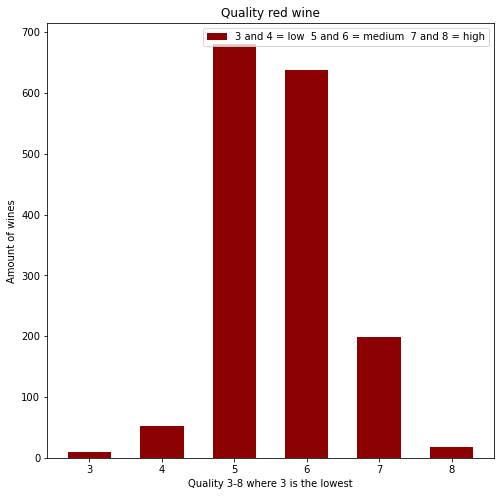

In [ ]:
quality = red_wine["quality"].value_counts()
plt.figure(figsize=(8, 8))
plt.bar(quality.index, quality, width=0.6, color="darkred")
plt.title("Quality red wine")
plt.xlabel("Quality 3-8 where 3 is the lowest")
plt.ylabel("Amount of wines")
plt.savefig("Quality of red wine.png", dpi=300)
plt.legend([("3 and 4 = low  5 and 6 = medium  7 and 8 = high")])

plt.show()

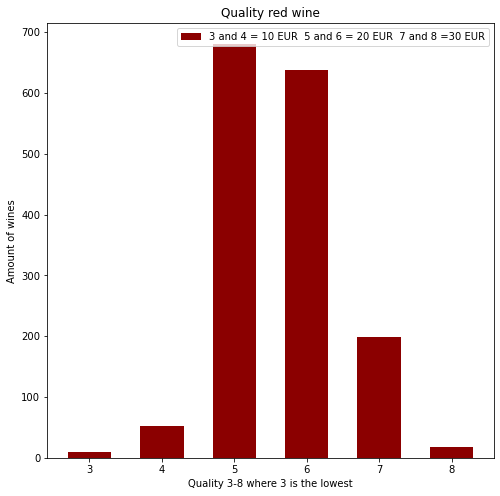

In [ ]:
quality= red_wine["quality"].value_counts()
plt.figure(figsize=(8, 8))
plt.bar(quality.index, quality, width=0.6, color="darkred")
plt.title("Quality red wine")
plt.xlabel("Quality 3-8 where 3 is the lowest")
plt.ylabel("Amount of wines")
plt.savefig("Quality of red wine.png", dpi=300)
plt.legend([("3 and 4 = 10 EUR  5 and 6 = 20 EUR  7 and 8 =30 EUR")])

plt.show()

([<matplotlib.patches.Wedge at 0x7fe54c0aadc0>,
 [Text(-0.8626063070997455, -1.40655976017791, 'medium'),
  Text(1.0296631183459202, 1.2892997567354754, 'high'),
  Text(0.20371188297120654, 1.6373763980027092, 'low')],
 [Text(-0.47051253114531566, -0.7672144146424963, '82.5%'),
  Text(0.5616344281886837, 0.7032544127648046, '13.6%'),
  Text(0.111115572529749, 0.8931143989105684, '3.9%')])

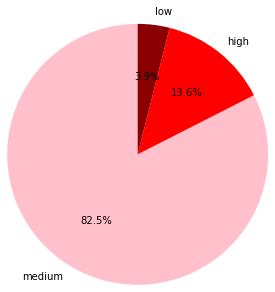

In [ ]:
red_comparison = red_wine["quality_label"].value_counts()
labels=("medium", "high", "low")
colors=("pink", "red", "darkred")

plt.pie(red_comparison, labels=labels,radius=1.5, startangle=90, colors=colors, autopct='%1.1f%%')


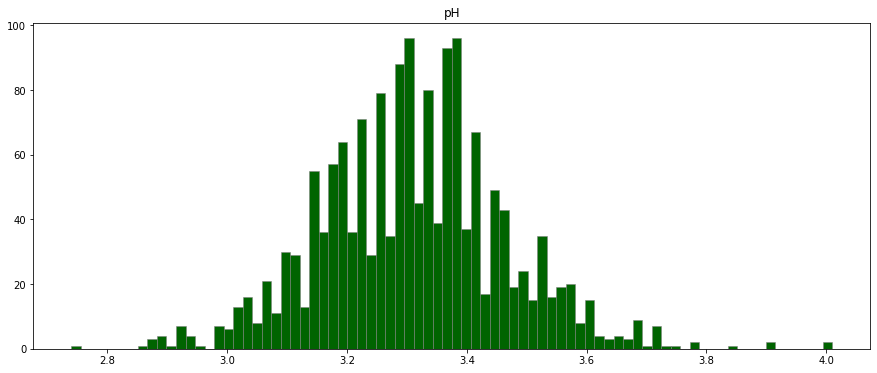

In [ ]:
#hist
plt.figure(figsize=(15, 6))
plt.title("pH")
plt.hist(red_wine['pH'], color='darkgreen', bins=80,
         edgecolor='grey', linewidth=0.5)
plt.show()

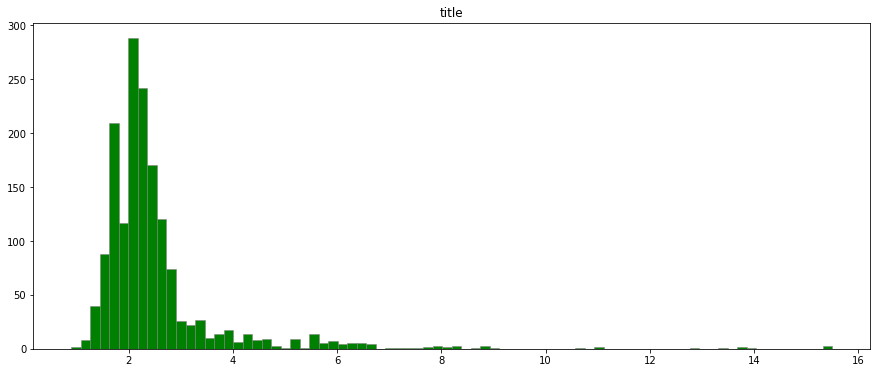

In [ ]:
#hist
plt.figure(figsize=(15, 6))
plt.title("title")
plt.hist(red_wine['residual sugar'], color='green', bins=80,
         edgecolor='grey', linewidth=0.5)
plt.show()

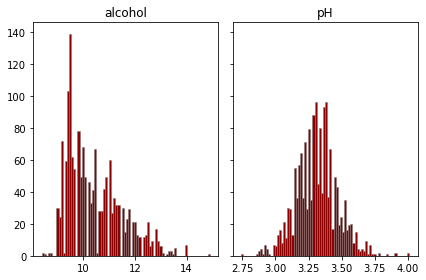

In [ ]:
fig, axs = plt.subplots(1, 2, sharey="row", tight_layout=True)

axs[0].set_title("alcohol")
axs[1].set_title("pH")

axs[0].hist(red_wine['alcohol'], color='darkred', bins=80,
         edgecolor='grey', linewidth=0.5)
axs[1].hist(red_wine['pH'], color='darkred', bins=80,
         edgecolor='grey', linewidth=0.5)


plt.show()

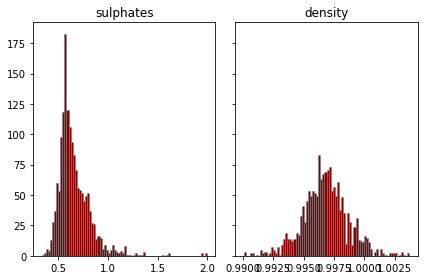

In [ ]:
fig, axs = plt.subplots(1, 2, sharey="row", tight_layout=True)

axs[0].set_title("sulphates")
axs[1].set_title("density")

axs[0].hist(red_wine['sulphates'], color='darkred', bins=80,
         edgecolor='grey', linewidth=0.5)
axs[1].hist(red_wine['density'], color='darkred', bins=80,
         edgecolor='grey', linewidth=0.5)


plt.show()

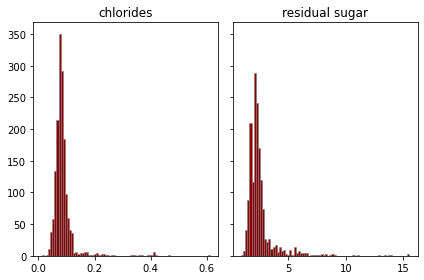

In [ ]:
fig, axs = plt.subplots(1, 2, sharey="row", tight_layout=True)

axs[0].set_title("chlorides")
axs[1].set_title("residual sugar")

axs[0].hist(red_wine['chlorides'], color='darkred', bins=80,
         edgecolor='grey', linewidth=0.5)
axs[1].hist(red_wine['residual sugar'], color='darkred', bins=80,
         edgecolor='grey', linewidth=0.5)

plt.show()

In [ ]:
sorted = np.sort(red_wine['quality'].unique())

Text(0.5, 1.0, 'Chlorides')

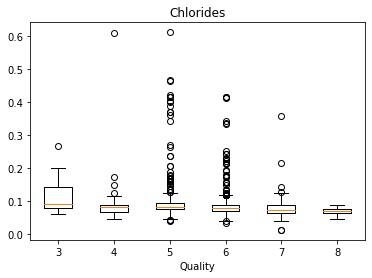

In [ ]:
quality_chlorides = {}
for i in sorted:
    quality_chlorides[i] = red_wine[red_wine['quality'] == i].chlorides
plt.boxplot([x for x in quality_chlorides.values()],
            labels=[x for x in quality_chlorides.keys()])
#x and y-axis labels
plt.xlabel('Quality')
plt.ylabel('')
#plot title
plt.title('Chlorides')




Text(0.5, 1.0, 'Residual sugar')

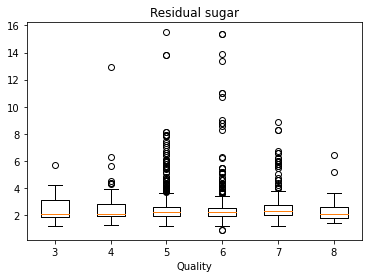

In [ ]:
quality_sugar = {}
for i in sorted:
    quality_sugar[i] = red_wine[red_wine['quality'] == i][("residual sugar")]
plt.boxplot([x for x in quality_sugar.values()],
            labels=[x for x in quality_sugar.keys()])
#x and y-axis labels
plt.xlabel('Quality')
plt.ylabel('')
#plot title
plt.title('Residual sugar')

Text(0.5, 1.0, 'Density')

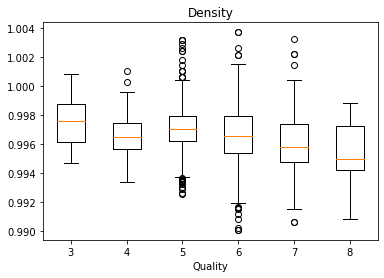

In [ ]:
quality_density = {}
for i in sorted:
    quality_density[i] = red_wine[red_wine['quality'] == i].density
plt.boxplot([x for x in quality_density.values()],
            labels=[x for x in quality_density.keys()])
#x and y-axis labels
plt.xlabel('Quality')
plt.ylabel('')
#plot title
plt.title('Density')

Text(0.5, 1.0, 'Sulphates')

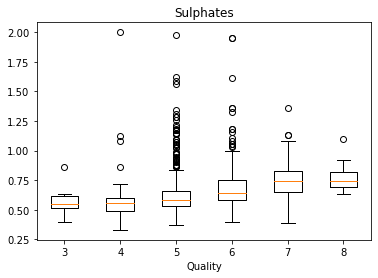

In [ ]:
quality_sulphates = {}
for i in sorted:
    quality_sulphates[i] = red_wine[red_wine['quality'] == i].sulphates
plt.boxplot([x for x in quality_sulphates.values()],
            labels=[x for x in quality_sulphates.keys()])
#x and y-axis labels
plt.xlabel('Quality')
plt.ylabel('')
#plot title
plt.title('Sulphates')

Text(0.5, 1.0, 'pH')

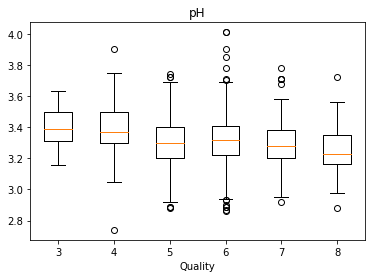

In [ ]:
quality_pH = {}
for i in sorted:
    quality_pH[i] = red_wine[red_wine['quality'] == i].pH
plt.boxplot([x for x in quality_pH.values()],
            labels=[x for x in quality_pH.keys()])
#x and y-axis labels
plt.xlabel('Quality')
plt.ylabel('')
#plot title
plt.title('pH')

Text(0.5, 1.0, 'Alcohol')

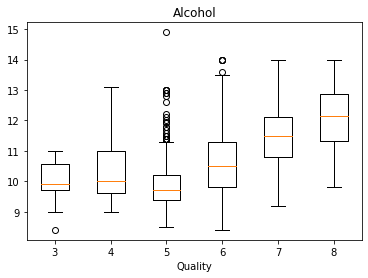

In [ ]:
quality_alcohol = {}
for i in sorted:
    quality_alcohol[i] = red_wine[red_wine['quality'] == i].alcohol
plt.boxplot([x for x in quality_alcohol.values()],
            labels=[x for x in quality_alcohol.keys()])
#x and y-axis labels
plt.xlabel('Quality')
plt.ylabel('')
#plot title
plt.title('Alcohol')

In [ ]:
#plt.figure(figsize=(6,4))
#plt.plot(red_wine.alcohol)
#plt.show()

In [ ]:
#bins = [8,9,10,11,12,13,14,15]

#plt.hist(red_wine.alcohol, bins=bins, color="red")

#plt.xticks(bins)

#plt.ylabel("Number of red wines")
#plt.xlabel("Promille of alcohol")
#plt.title("Overview of alcohol")

#plt.show()

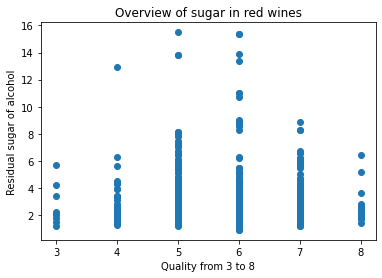

In [ ]:
plt.plot( red_wine.quality, red_wine["residual sugar"], "o")
plt.ylabel("Residual sugar of alcohol")
plt.xlabel("Quality from 3 to 8")
plt.title("Overview of sugar in red wines")
plt.show()

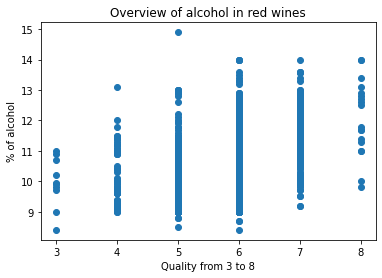

In [ ]:
plt.plot( red_wine.quality, red_wine.alcohol, "o")
plt.ylabel("% of alcohol")
plt.xlabel("Quality from 3 to 8")
plt.title("Overview of alcohol in red wines")
plt.show()


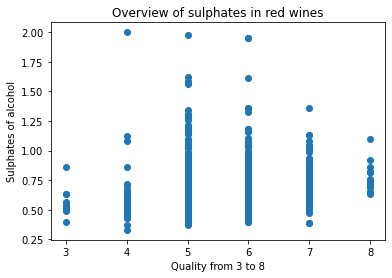

In [ ]:
plt.plot( red_wine.quality, red_wine.sulphates, "o")
plt.ylabel("Sulphates of alcohol")
plt.xlabel("Quality from 3 to 8")
plt.title("Overview of sulphates in red wines")
plt.show()

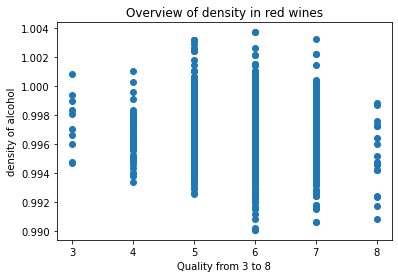

In [ ]:
plt.plot( red_wine.quality, red_wine.density, "o")
plt.ylabel("density of alcohol")
plt.xlabel("Quality from 3 to 8")
plt.title("Overview of density in red wines")
plt.show()

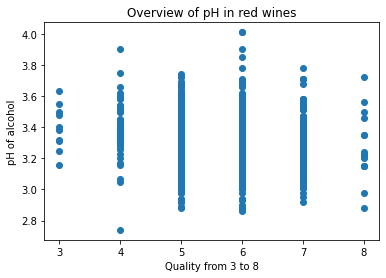

In [ ]:
plt.plot( red_wine.quality, red_wine.pH, "o")
plt.ylabel("pH of alcohol")
plt.xlabel("Quality from 3 to 8")
plt.title("Overview of pH in red wines")
plt.show()

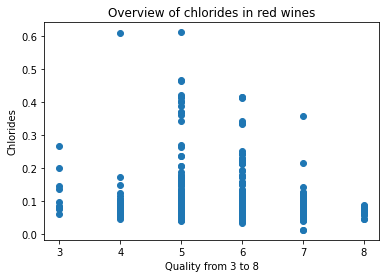

In [ ]:
plt.plot( red_wine.quality, red_wine.chlorides, "o")
plt.ylabel("Chlorides")
plt.xlabel("Quality from 3 to 8")
plt.title("Overview of chlorides in red wines")
plt.show()

In [ ]:
medium_red = red_wine[red_wine.quality_label == "medium"]
high_red = red_wine[red_wine.quality_label == "high"]
low_red = red_wine[red_wine.quality_label == "low"]

high_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,7,high
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,7,high
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,7,high
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.70,7,high
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.50,7,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90,7,high
1544,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,7,high
1549,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,8,high
1555,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,7,high


In [ ]:
#plt.plot(medium_red.alcohol, medium_red.chlorides, "o")
#plt.legend(["Alcohol", "Chlorides"])
#plt.xlabel("alcohol in promille")
#plt.ylabel("chloride amount")
#plt.plot(medium_red.alcohol,medium_red.alcohol / 10**6)
#plt.plot(medium_red.chlorides,medium_red.chlorides / 10**6)

In [ ]:
#plt.plot(medium_red.alcohol, medium_red.quality_label,"+", high_red.alcohol, high_red.quality_label, "o")
#plt.xlabel("alcohol in promille")


In [ ]:
#hist multiple variables

#high_red.alcohol.plot.hist(bins=40, figsize=(10,8))
#high_red.density.plot.hist()
#high_red.pH.plot.hist()



In [ ]:
red_wine[["alcohol", "residual sugar", "density", "chlorides", "pH", "sulphates", "quality_label"]]

,alcohol,residual sugar,density,chlorides,pH,sulphates,quality_label
0,9.4,1.9,0.99780,0.076,3.51,0.56,medium
1,9.8,2.6,0.99680,0.098,3.20,0.68,medium
2,9.8,2.3,0.99700,0.092,3.26,0.65,medium
3,9.8,1.9,0.99800,0.075,3.16,0.58,medium
4,9.4,1.9,0.99780,0.076,3.51,0.56,medium
...,...,...,...,...,...,...,...
1594,10.5,2.0,0.99490,0.090,3.45,0.58,medium
1595,11.2,2.2,0.99512,0.062,3.52,0.76,medium
1596,11.0,2.3,0.99574,0.076,3.42,0.75,medium
1597,10.2,2.0,0.99547,0.075,3.57,0.71,medium


In [ ]:
#red_wine[["alcohol", "residual sugar", "quality_label"]].plot.hist(bins=40, figsize=(10,6), alpha=0.6, sharex=True, sharey=True)
#plt.show

In [ ]:
#red_wine[["alcohol", "residual sugar", "quality_label"]].hist(bins=40, figsize=(12,8), alpha=0.6,grid=False, rwidth=0.8, sharex=True, sharey=True)


In [ ]:
#high_red.hist(column="alcohol",by="density", bins=15,figsize=(12,8),alpha=0.6,grid=False,rwidth=0.8, sharex=True, sharey=True) 


#plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

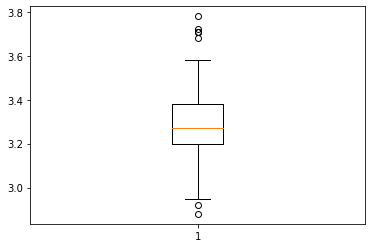

In [ ]:
#plt.boxplot(red_wine["pH"])
#plt.boxplot(medium_red["pH"])
plt.boxplot(high_red["pH"])
plt.show

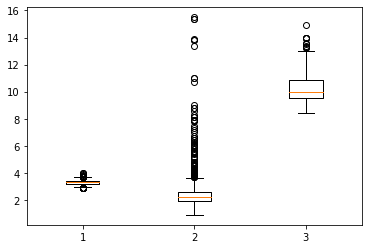

In [ ]:
data = [medium_red["pH"], medium_red["residual sugar"], medium_red["alcohol"]]
plt.boxplot(data)
plt.show()

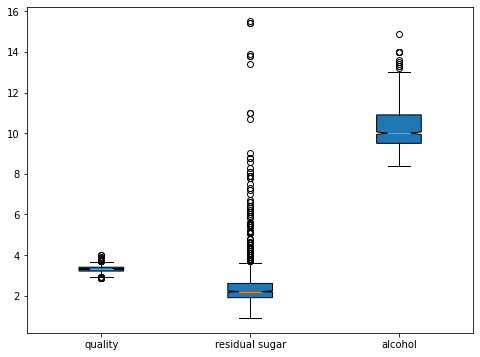

In [ ]:
plt.figure(figsize=(8,6))
plt.boxplot(data, notch = True, patch_artist=True, labels = ["quality", "residual sugar", "alcohol"])
plt.show()

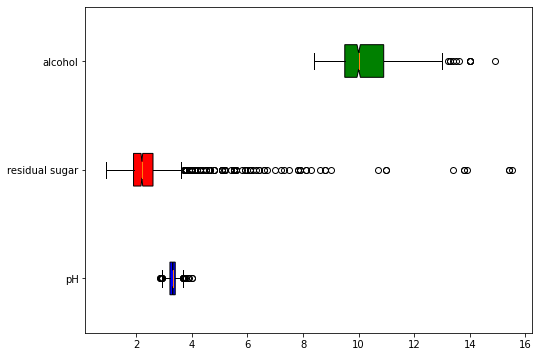

In [ ]:
plt.figure(figsize=(8,6))
box = plt.boxplot(data, vert=0, notch = True, patch_artist=True, labels = ["pH", "residual sugar", "alcohol"])
colors = ["blue", "red", "green"]
for patch, color in zip(box["boxes"], colors):
    patch.set_facecolor(color)
plt.show()